К вам пришел заказчик со следующей задачей: необходимо провести анализ работы юридического отдела. Для этого вам будет предоставлена выгрузка данных из системы (в формате csv с разделителем «;»), в которой отслеживается исполнение юристами задач. 

Каждая строчка – это отдельная задача. Ниже представлено описание полей одной строчки:
    * Фамилия и Имя – Фамилия и Имя исполнителя задачи
    * Сегмент запроса – сегмент бизнеса, который поставил задачу («Малый и Микро бизнес», «Крупный и Средний бизнес», «Крупнейший бизнес»)
    * Тип задачи – категория задачи, которую сегмент попросил исполнить
    * Начало выполнения – временная метка начала выполнения задачи
    * Конец выполнения – временная метка окончания выполнения задачи
    * Число доработок – число доработок задачи. Задача может отправляться исполнителем на доработку, к примеру, исполнитель мог запросить у автора заявки дополнительную информацию

Вы вместе с заказчиком придумали следующие задачи к анализу:
    1. Необходимо определить, какой процент заявок падает от каждого из сегментов
    2. Необходимо определить ТОП-5 типов задач:
        a. Отдельно без сегментов
        b. Отдельно в разрезе каждого из сегментов
    3. От какого из сегментов приходит больше всего задач, которые отправлялись на доработку? Какое распределение числа доработок задач в разрезе каждого из сегментов?
    4. Хотелось бы проверить, есть ли у отдельно взятого сотрудника какая-то сегментная специализация. 
       Подумайте, как бы это можно было сделать, и посчитайте, какое число людей на самом деле специализируются на задачах сегмента «Малый и Микро бизнес»?
    5. Каждый тип задач по нормативным документам должен быть выполнен за 3 рабочих дня. Необходимо проверить, так ли это. 
       Подумайте, есть ли какие-то проблемы в данных, которые затрудняют анализ.

Проведите анализ с использованием языка Python, можете использовать любые библиотеки для помощи. Очень желательно, чтобы анализ был подкреплен соответствующей визуализацией (подумайте, какие типы графиков наиболее подходят для каждой из задач).

In [1]:
import pandas as pd
import pylab as plt
from datetime import timedelta
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('.\LAWYERS.csv\LAWYERS.csv', sep=';', encoding='utf8', parse_dates=['Начало выполнения', 'Конец выполнения'])
df.head()

,Фамилия и Имя,Сегмент запроса,Тип задачи,Начало выполнения,Конец выполнения,Число доработок
0,Ларионов Герман,Крупный и Средний бизнес,Правовая экспертиза сделки,2015-01-14 17:27:13.206830853,2015-01-16 00:37:51.920748629,0
1,Старостин Ярослав,Малый и Микро бизнес,Согласование (экспертиза) решения коллегиально...,2015-01-16 12:31:02.733055794,2015-01-16 14:12:42.354844889,0
2,Алехин Лев,Малый и Микро бизнес,"Иные вопросы, связанные с кредитованием корпор...",2015-01-13 17:41:49.763859815,2015-01-16 18:01:34.575222876,1
3,Горшков Климент,Крупнейший бизнес,Согласование (визирование) кредитно-обеспечите...,2015-01-14 13:27:08.586850817,2015-01-16 18:29:41.620926290,0
4,Виноградов Митрофан,Крупный и Средний бизнес,"Иные вопросы, связанные с кредитованием корпор...",2015-01-12 14:19:04.004458711,2015-01-16 15:07:28.789318961,0


In [3]:
# посмотрим на наличие дубликатов
df.shape, df.drop_duplicates().shape

((2132496, 6), (2132496, 6))

In [4]:
# посмотрим на пропущенные значения
df.info(null_counts=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132496 entries, 0 to 2132495
Data columns (total 6 columns):
Фамилия и Имя        2132496 non-null object
Сегмент запроса      2132496 non-null object
Тип задачи           2132496 non-null object
Начало выполнения    2132496 non-null datetime64[ns]
Конец выполнения     2132496 non-null datetime64[ns]
Число доработок      2132496 non-null int64
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 97.6+ MB


Полных дубликатов и пропущенных значений нет

##    1. Какой процент заявок падает от каждого из сегментов?

In [5]:
df['Сегмент запроса'].value_counts(normalize=True)

Крупный и Средний бизнес    0.615706
Малый и Микро бизнес        0.241355
Крупнейший бизнес           0.142939
Name: Сегмент запроса, dtype: float64

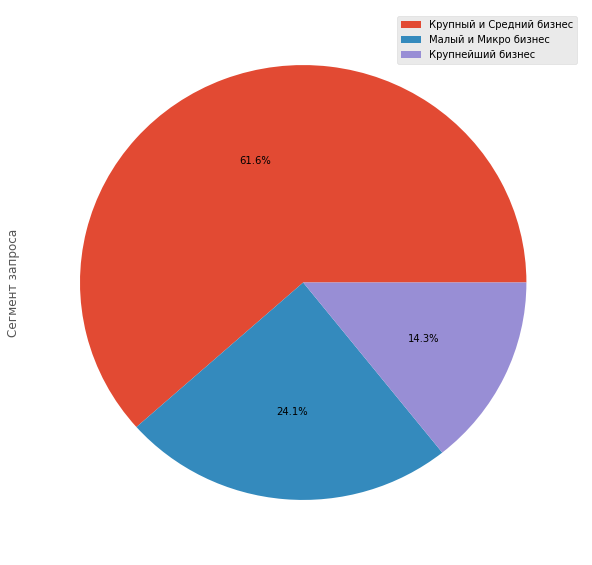

In [6]:
df['Сегмент запроса'].value_counts(normalize=True).plot.pie(figsize=(10, 10), autopct='%1.1f%%', labels=None);
plt.legend(df['Сегмент запроса'].unique());

##    2. ТОП-5 типов задач:

In [7]:
# a. Отдельно без сегментов
df['Тип задачи'].value_counts(normalize=True).head()

Согласование (визирование) кредитно-обеспечительной документации    0.359309
Правовая экспертиза сделки                                          0.221378
Согласование (экспертиза) решения коллегиального органа Банка       0.199900
Иные вопросы, связанные с кредитованием корпоративных клиентов      0.176872
Иное                                                                0.012360
Name: Тип задачи, dtype: float64

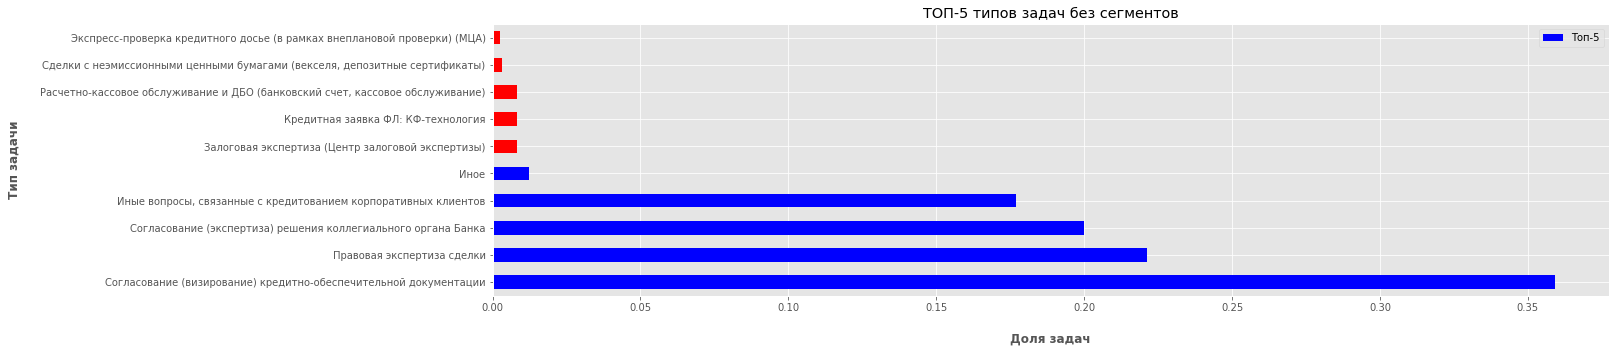

In [8]:
df['Тип задачи'].value_counts(normalize=True).plot(kind='barh', figsize=(20, 5), color=5*['b']+5*['r']);
plt.ylabel("Тип задачи", labelpad=20, weight='bold', size=12);
plt.xlabel("Доля задач", labelpad=20, weight='bold', size=12);
plt.title('ТОП-5 типов задач без сегментов')
plt.legend(['Топ-5']);

In [9]:
# b. Отдельно в разрезе каждого из сегментов
top_segment  = df.groupby(['Сегмент запроса', 'Тип задачи']).size().reset_index().groupby('Сегмент запроса').apply(lambda x: x.nlargest(5, 0)).reset_index(drop=True)
top_segment

,Сегмент запроса,Тип задачи,0
0,Крупнейший бизнес,Согласование (визирование) кредитно-обеспечите...,109898
1,Крупнейший бизнес,Правовая экспертиза сделки,67206
2,Крупнейший бизнес,Согласование (экспертиза) решения коллегиально...,60857
3,Крупнейший бизнес,"Иные вопросы, связанные с кредитованием корпор...",54013
4,Крупнейший бизнес,Иное,3665
5,Крупный и Средний бизнес,Согласование (визирование) кредитно-обеспечите...,471523
6,Крупный и Средний бизнес,Правовая экспертиза сделки,290851
7,Крупный и Средний бизнес,Согласование (экспертиза) решения коллегиально...,262610
8,Крупный и Средний бизнес,"Иные вопросы, связанные с кредитованием корпор...",232143
9,Крупный и Средний бизнес,Иное,16200


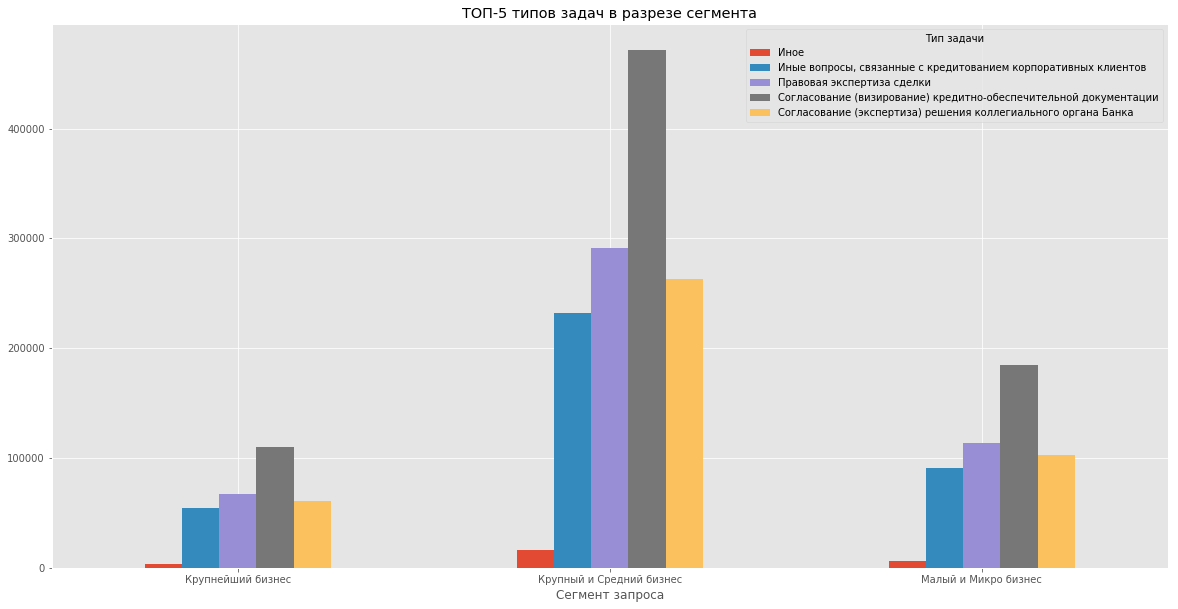

In [10]:
top_segment.pivot_table(index='Сегмент запроса', columns='Тип задачи', values=0).plot(kind='bar', figsize=(20, 10));
plt.xticks(rotation='0');
plt.title('ТОП-5 типов задач в разрезе сегмента');

## 3. От какого из сегментов приходит больше всего задач, которые отправлялись на доработку? Какое распределение числа доработок задач в разрезе каждого из сегментов?

In [11]:
df.loc[df['Число доработок']>0]['Сегмент запроса'].value_counts()

Крупный и Средний бизнес    293050
Малый и Микро бизнес        114777
Крупнейший бизнес            68243
Name: Сегмент запроса, dtype: int64

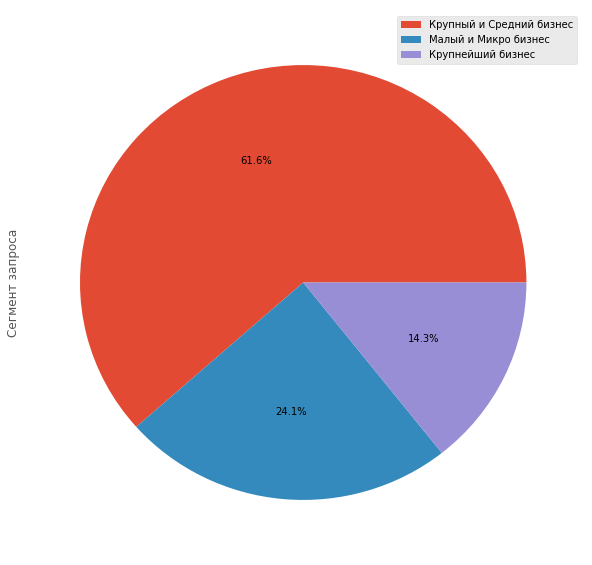

In [12]:
df.loc[df['Число доработок']>0]['Сегмент запроса'].value_counts().plot.pie(figsize=(10, 10), autopct='%1.1f%%', labels=None);
plt.legend(df['Сегмент запроса'].unique());

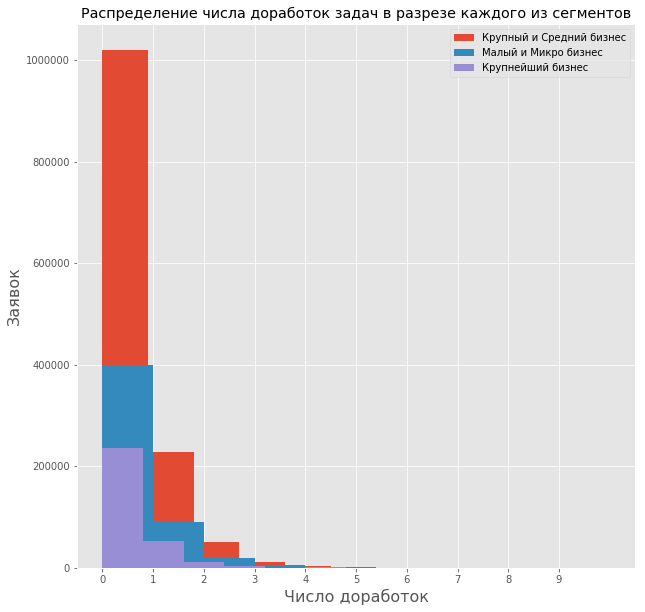

In [13]:
segments = df['Сегмент запроса'].unique()

for seg in segments:
    df.loc[df['Сегмент запроса']==seg]['Число доработок'].hist(figsize=(10, 10));
plt.xlabel("Число доработок", fontsize=16);  
plt.ylabel("Заявок", fontsize=16);
plt.xticks(list(range(10)))
plt.title('Распределение числа доработок задач в разрезе каждого из сегментов')
plt.legend(segments);

Распределение скошенное экспоненциальное, правые хвосты до 10 доработок 

    4. Хотелось бы проверить, есть ли у отдельно взятого сотрудника какая-то сегментная специализация. 
       Подумайте, как бы это можно было сделать, и посчитайте, какое число людей на самом деле специализируются на задачах сегмента «Малый и Микро бизнес»?

In [14]:
# уникальных сотрудников по ФИО

df['Фамилия и Имя'].nunique()

474

In [15]:
df['Малый и Микро бизнес'] = 0
df.loc[df['Сегмент запроса']=='Малый и Микро бизнес', 'Малый и Микро бизнес'] = 1
df.head()

,Фамилия и Имя,Сегмент запроса,Тип задачи,Начало выполнения,Конец выполнения,Число доработок,Малый и Микро бизнес
0,Ларионов Герман,Крупный и Средний бизнес,Правовая экспертиза сделки,2015-01-14 17:27:13.206830853,2015-01-16 00:37:51.920748629,0,0
1,Старостин Ярослав,Малый и Микро бизнес,Согласование (экспертиза) решения коллегиально...,2015-01-16 12:31:02.733055794,2015-01-16 14:12:42.354844889,0,1
2,Алехин Лев,Малый и Микро бизнес,"Иные вопросы, связанные с кредитованием корпор...",2015-01-13 17:41:49.763859815,2015-01-16 18:01:34.575222876,1,1
3,Горшков Климент,Крупнейший бизнес,Согласование (визирование) кредитно-обеспечите...,2015-01-14 13:27:08.586850817,2015-01-16 18:29:41.620926290,0,0
4,Виноградов Митрофан,Крупный и Средний бизнес,"Иные вопросы, связанные с кредитованием корпор...",2015-01-12 14:19:04.004458711,2015-01-16 15:07:28.789318961,0,0


In [16]:
# найдем для каждого сотрудника долю заявок на Малый и Микро бизнес и остальные

df_dol = df.groupby(['Фамилия и Имя', 'Малый и Микро бизнес'])['Тип задачи'].count().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index()
df_dol.head()

,Фамилия и Имя,Малый и Микро бизнес,Тип задачи
0,Абрамов Альвиан,0,90.149796
1,Абрамов Альвиан,1,9.850204
2,Абрамова Вера,0,18.225315
3,Абрамова Вера,1,81.774685
4,Агапов Антонин,0,91.039823


In [17]:
df_dol_pivot = df_dol.pivot_table(index='Фамилия и Имя', columns='Малый и Микро бизнес', values='Тип задачи')
df_dol_pivot.head()

Малый и Микро бизнес,0,1
Фамилия и Имя,,
Абрамов Альвиан,90.149796,9.850204
Абрамова Вера,18.225315,81.774685
Агапов Антонин,91.039823,8.960177
Агапов Святополк,91.082251,8.917749
Агафонов Виссарион,18.504795,81.495205


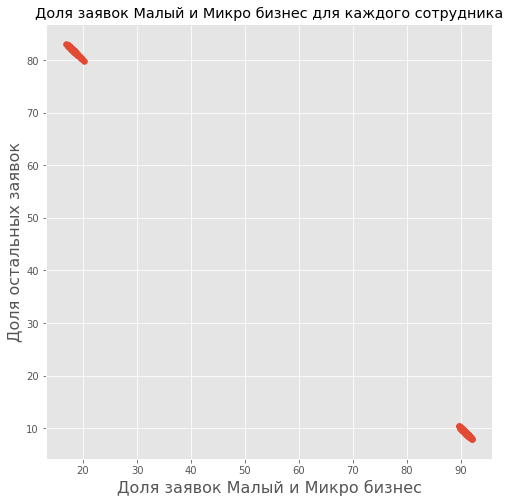

In [18]:
plt.figure(figsize=(8, 8))
plt.scatter(df_dol_pivot[0], df_dol_pivot[1]);
plt.xlabel("Доля заявок Малый и Микро бизнес", fontsize=16);  
plt.ylabel("Доля остальных заявок", fontsize=16);
plt.title('Доля заявок Малый и Микро бизнес для каждого сотрудника');

По графику четко видно, что присутствуют: 
    * сотрудники у которых доля заявок "Малый и Микро бизнес" - ~90%, тогда как на остальные приходится ~10% соответственно - эти сотрудники специализхируются на сегменте "Малый и Микро бизнес"
    * сотрудники у которых доля заявок "Малый и Микро бизнес" - ~10%, тогда как на остальные приходится ~90% соответственно - эти сотрудники не специализируются на сегменте "Малый и Микро бизнес"
    
Возможные идеи:
    * рассмотреть цикл заявок по типу сегмента цепочками по каждому сотруднику - если цепочка из одинаковых заявок для сотрудника длинная, возможно, это его специализация

    5. Каждый тип задач по нормативным документам должен быть выполнен за 3 рабочих дня. Необходимо проверить, так ли это. 
       Подумайте, есть ли какие-то проблемы в данных, которые затрудняют анализ.

Возможные проблемы:
    * учесть выходные дни
    * учесть праздничные дни по производственному календарю
    * сотрудник может работать в выходной

In [19]:
# воспользуюсь спарсенным производственным календарем, в котором указаны все выходные даты по производственному календарю

df_holyday = pd.read_excel('calend.xlsx', index_col=0)
df_holyday.head()

,is_weekend,celebration,not_working
1999-01-01,0,1,1
1999-01-02,0,1,1
1999-01-03,0,1,1
1999-01-04,0,1,1
1999-01-07,0,1,1


In [20]:
def count_holidays(df):
    '''Возвращает количество нерабочих дней из временного диапазона'''
    
    return df_holyday.loc[df['Начало выполнения']:df['Конец выполнения']]['not_working'].sum()

def work_day(df):
    '''Возвращает длительность работы над заявкой с учетом нерабочих дней'''
    
    return df['Calendars_days'] - timedelta(days=df['Holydays'])

In [21]:
# календарное время работы над заявкой 

df['Calendars_days'] = df['Конец выполнения'] - df['Начало выполнения']

In [22]:
%%time

# полных выходных дней между началом и окончанием работы над заявкой 

df['Holydays'] = df.apply(count_holidays, axis=1)

Wall time: 12min 9s


In [23]:
%%time

# время работы над заявкой с учетом рабочих дней

df['Work_days'] = df.apply(work_day, axis=1)

Wall time: 1min 43s


In [24]:
df.head()

,Фамилия и Имя,Сегмент запроса,Тип задачи,Начало выполнения,Конец выполнения,Число доработок,Малый и Микро бизнес,Calendars_days,Holydays,Work_days
0,Ларионов Герман,Крупный и Средний бизнес,Правовая экспертиза сделки,2015-01-14 17:27:13.206830853,2015-01-16 00:37:51.920748629,0,0,1 days 07:10:38.713917,0,1 days 07:10:38.713917
1,Старостин Ярослав,Малый и Микро бизнес,Согласование (экспертиза) решения коллегиально...,2015-01-16 12:31:02.733055794,2015-01-16 14:12:42.354844889,0,1,0 days 01:41:39.621789,0,0 days 01:41:39.621789
2,Алехин Лев,Малый и Микро бизнес,"Иные вопросы, связанные с кредитованием корпор...",2015-01-13 17:41:49.763859815,2015-01-16 18:01:34.575222876,1,1,3 days 00:19:44.811363,0,3 days 00:19:44.811363
3,Горшков Климент,Крупнейший бизнес,Согласование (визирование) кредитно-обеспечите...,2015-01-14 13:27:08.586850817,2015-01-16 18:29:41.620926290,0,0,2 days 05:02:33.034075,0,2 days 05:02:33.034075
4,Виноградов Митрофан,Крупный и Средний бизнес,"Иные вопросы, связанные с кредитованием корпор...",2015-01-12 14:19:04.004458711,2015-01-16 15:07:28.789318961,0,0,4 days 00:48:24.784860,0,4 days 00:48:24.784860


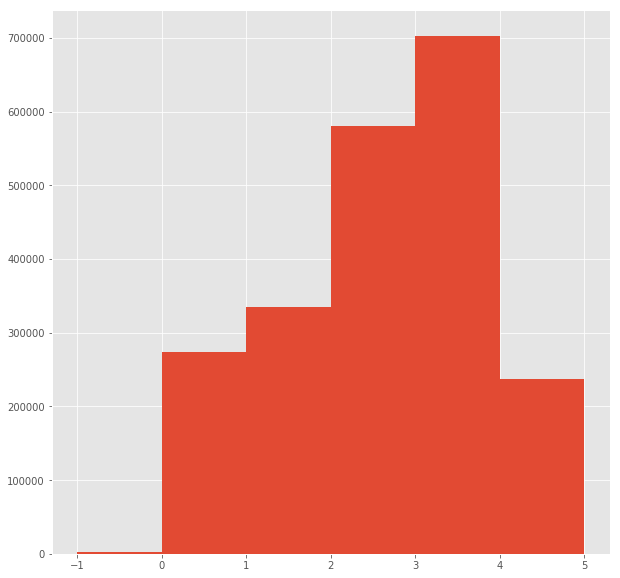

In [25]:
# посмотрим на распределение времени работы над заявкой в днях

df['Work_days'].dt.days.hist(figsize=(10, 10), bins=6);

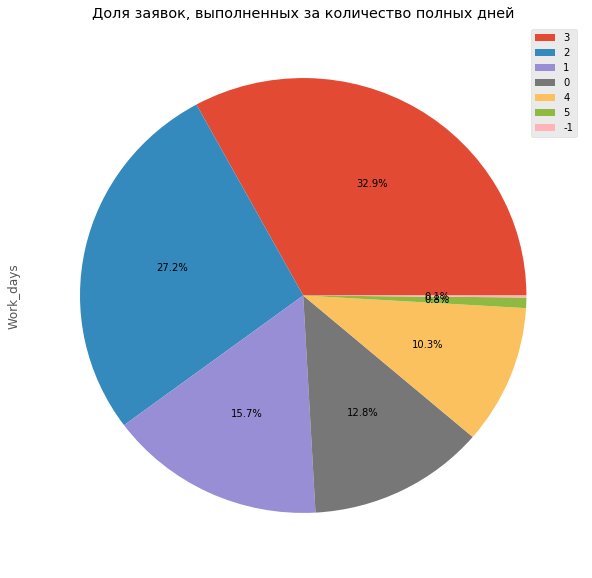

In [26]:
df['Work_days'].dt.days.value_counts().plot.pie(figsize=(10, 10), autopct='%1.1f%%', labels=None);
plt.legend(df['Work_days'].dt.days.value_counts().index);
plt.title('Доля заявок, выполненных за количество полных дней');

Видим резкое падение с 3 дня на 4, что говорит о наличии норматива

Посмотрим на долю выполненных заявок в отведенное нормативное время

In [27]:
df.loc[df['Work_days'].dt.days<3].shape[0] / df.shape[0]

0.5593084348106632

In [28]:
df.loc[df['Work_days'].dt.days==3].shape[0] / df.shape[0]

0.3293999144664281

    56 % заявок выполнены в срок менее 3 полных дней
    33 % заявок выполнены в срок 3 полных дней